In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [4]:
print(tf.__version__)

2.5.0


In [9]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCH=25

In [10]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "datasetNew/train", 
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 4105 files belonging to 3 classes.


In [11]:
class_names=dataset.class_names
print(class_names)

['Potato___healthy', 'cassava', 'tomato']


In [12]:
len(dataset)

129

(32, 256, 256, 3)
[2 1 0 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 0 2 1 1 0 2 2 1 0 1 0 1 2 2]
(32, 256, 256, 3)
[2 1 0 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 0 2 1 1 0 2 2 1 0 1 0 1 2 2]
(32, 256, 256, 3)
[2 1 0 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 0 2 1 1 0 2 2 1 0 1 0 1 2 2]
(32, 256, 256, 3)
[2 1 0 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 0 2 1 1 0 2 2 1 0 1 0 1 2 2]
(32, 256, 256, 3)
[2 1 0 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 0 2 1 1 0 2 2 1 0 1 0 1 2 2]
(32, 256, 256, 3)
[2 1 0 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 0 2 1 1 0 2 2 1 0 1 0 1 2 2]
(32, 256, 256, 3)
[2 1 0 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 0 2 1 1 0 2 2 1 0 1 0 1 2 2]
(32, 256, 256, 3)
[2 1 0 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 0 2 1 1 0 2 2 1 0 1 0 1 2 2]
(32, 256, 256, 3)
[2 1 0 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 0 2 1 1 0 2 2 1 0 1 0 1 2 2]
(32, 256, 256, 3)
[2 1 0 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 0 2 1 1 0 2 2 1 0 1 0 1 2 2]
(32, 256, 256, 3)
[2 1 0 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 0 2 1 1 0 2 2 1 0 1 0 1 2 2]
(32, 256, 256, 3)
[2 1 0 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 0 2 1 1 0 2 2 1 0 1 0

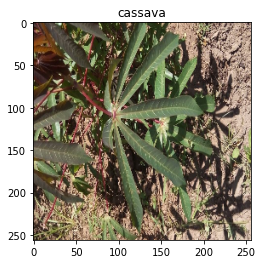

In [13]:
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        print(image_batch.shape)
        print(label_batch.numpy())
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    
    train_size= int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

103

In [17]:
len(val_ds)

12

In [18]:
len(test_ds)

14

In [19]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [22]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model=models.Sequential([
    resize_and_rescale,
#     data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape = input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 30, 30, 64)         

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history=model.fit(
    train_ds,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/25
103/103 [==============================] - 706s 6s/step - loss: 0.2911 - accuracy: 0.8784 - val_loss: 0.0371 - val_accuracy: 0.9861
Epoch 2/25
103/103 [==============================] - 2120s 21s/step - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.0100 - val_accuracy: 0.9972
Epoch 3/25
103/103 [==============================] - 607s 6s/step - loss: 0.0864 - accuracy: 0.9743 - val_loss: 0.0111 - val_accuracy: 0.9972
Epoch 4/25
103/103 [==============================] - 487s 5s/step - loss: 0.0562 - accuracy: 0.9817 - val_loss: 0.0713 - val_accuracy: 0.9806
Epoch 5/25
103/103 [==============================] - 606s 6s/step - loss: 0.0440 - accuracy: 0.9856 - val_loss: 0.0208 - val_accuracy: 0.9945
Epoch 6/25
103/103 [==============================] - 469s 5s/step - loss: 0.0152 - accuracy: 0.9945 - val_loss: 0.0084 - val_accuracy: 0.9972
Epoch 7/25
103/103 [==============================] - 566s 6s/step - loss: 0.0508 - accuracy: 0.9872 - val_loss: 0.0036 - val_accuracy: 1.00

In [26]:
history.history['accuracy']

[0.8783990144729614,
 0.9835013747215271,
 0.9743354916572571,
 0.9816681742668152,
 0.9856401085853577,
 0.994500458240509,
 0.9871677160263062,
 0.9938893914222717,
 0.9893064498901367,
 0.9813626408576965,
 0.9917507171630859,
 0.999083399772644,
 0.9972502589225769,
 0.99083411693573,
 0.9960281252861023,
 0.9993889331817627,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [27]:
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

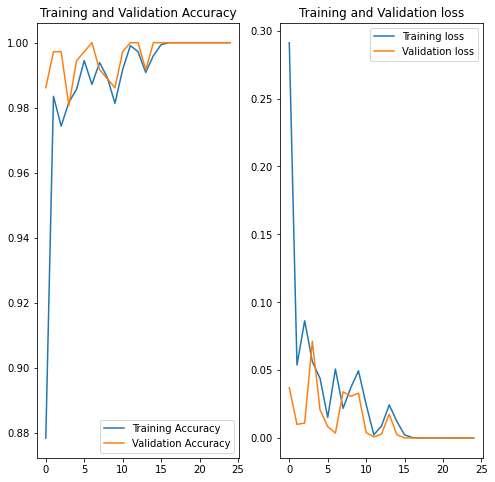

In [31]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCH),acc,label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCH),loss,label='Training loss')
plt.plot(range(EPOCH), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()


first image to predict
actual label:  tomato
predicted label:  tomato


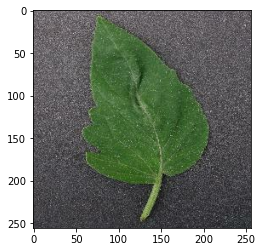

In [33]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label: ",class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print("predicted label: ",class_names[np.argmax(batch_prediction[0])])

In [34]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 *(np.max(predictions[0])),2)
    return predicted_class, confidence

<ipython-input-35-fc5f0c480df5>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(10,3,i+1)


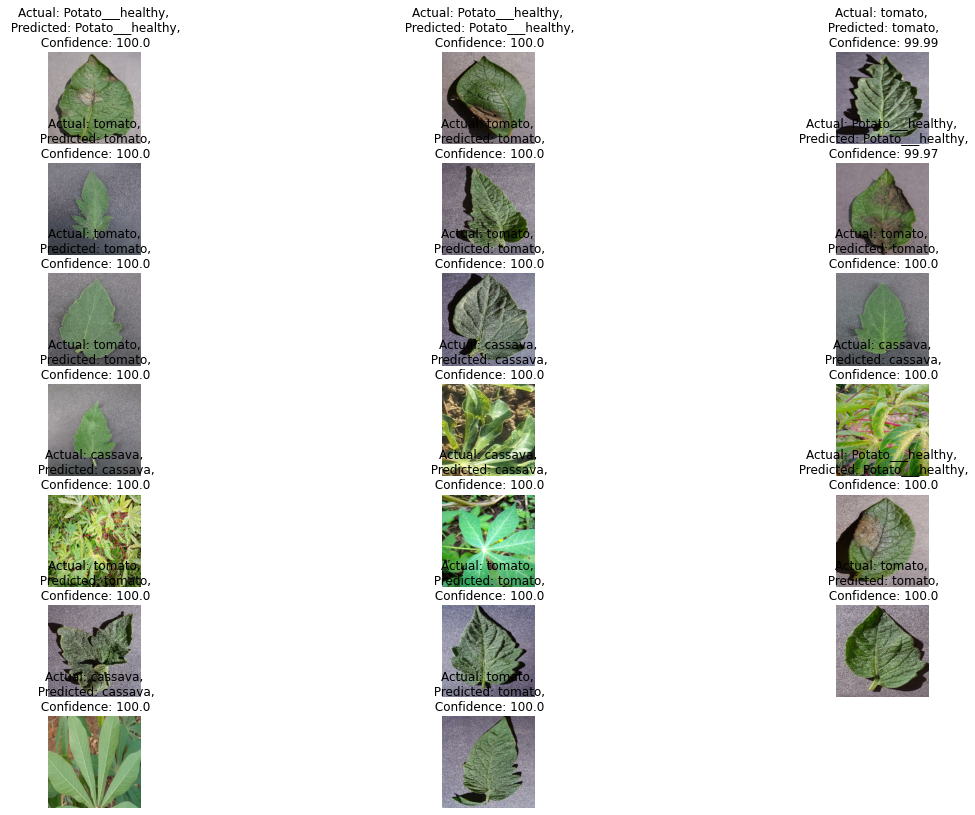

In [35]:
plt.figure(figsize=(20,20))
for images, labels in test_ds.take(2):
    for i in range(20):
        ax=plt.subplot(10,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}")

In [36]:
import os

model_version=max([int(i) for i in os.listdir("../Model")+[0]])+1
model.save(f"../Model/{model_version}")

INFO:tensorflow:Assets written to: ../Model/3\assets
